
1. **Project Title:**
**PGA Player Performance Predictor**

2. Introduction:
An analytical model developed to predict the average score of PGA players based on various performance metrics, showcasing proficiency in data preprocessing, feature selection, model training, and evaluation.

3. Objective:
To predict and understand the influence of different player statistics on their average scores.

4. Data Source:
This will be an exploratory analysis of PGA Data from 2010-2018 https://www.kaggle.com/datasets/jmpark746/pga-tour-data-2010-2018

5. Features:
Fairway Percentage
GIR (Greens in Regulation)
Average Putts
Average Distance
SG:APR (Strokes Gained: Approach)

6. Data Preprocessing:


7. Exploratory Data Analysis:


8. Model Selection and Training:
Discuss why you chose Linear Regression and Random Forest, and mention any other models you experimented with.

9. Evaluation Metrics:
MSE
RMSE
Cross-validation results - Not sure what this is or what it did

10. Key Insights:
Influence of various metrics on average scores (using feature importance and coefficients).
Clustering results, showing different profiles of players based on their stats.

11. Usage:
A brief guide on how to input player statistics to predict their average score.

12. Conclusion & Future Scope:


13. Acknowledgments:
Credit any sources, libraries, or tools you used.




In [38]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve



In [39]:
df = pd.read_csv('pgaTourData.csv')

In [40]:
df.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')

In [41]:
df.describe



<bound method NDFrame.describe of              Player Name  Rounds  Fairway Percentage  Year  Avg Distance  \
0         Henrik Stenson    60.0               75.19  2018         291.5   
1            Ryan Armour   109.0               73.58  2018         283.5   
2            Chez Reavie    93.0               72.24  2018         286.5   
3             Ryan Moore    78.0               71.94  2018         289.2   
4           Brian Stuard   103.0               71.44  2018         278.9   
...                  ...     ...                 ...   ...           ...   
2307        Carl Paulson     NaN                 NaN  2012           NaN   
2308      Peter Tomasulo     NaN                 NaN  2012           NaN   
2309        Marc Turnesa     NaN                 NaN  2010           NaN   
2310     Jesper Parnevik     NaN                 NaN  2010           NaN   
2311  Jim Gallagher, Jr.     NaN                 NaN  2010           NaN   

        gir  Average Putts  Average Scrambling  Avera

In [42]:
dfc = df.dropna(subset=['Average Score'])
dfc.describe

# There should be an average score if they actually played in a tournament

<bound method NDFrame.describe of          Player Name  Rounds  Fairway Percentage  Year  Avg Distance    gir  \
0     Henrik Stenson    60.0               75.19  2018         291.5  73.51   
1        Ryan Armour   109.0               73.58  2018         283.5  68.22   
2        Chez Reavie    93.0               72.24  2018         286.5  68.67   
3         Ryan Moore    78.0               71.94  2018         289.2  68.80   
4       Brian Stuard   103.0               71.44  2018         278.9  67.12   
...              ...     ...                 ...   ...           ...    ...   
1673  Phil Mickelson    76.0               52.66  2010         299.1  65.13   
1674       John Daly    63.0               52.21  2010         305.7  65.66   
1675    Jimmy Walker    82.0               51.29  2010         292.9  65.88   
1676   Daniel Chopra    74.0               51.27  2010         295.9  61.64   
1677   Martin Flores    75.0               50.15  2010         300.7  64.79   

      Average Put

In [43]:
dfc.info()

# This data is fairly clean...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 1677
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         1678 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                1678 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              1674 non-null   object 
 10  Wins                283 non-null    float64
 11  Top 10              1353 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64
 16  SG:ARG

<ipython-input-44-cc8dd85eeb3b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


<Axes: >

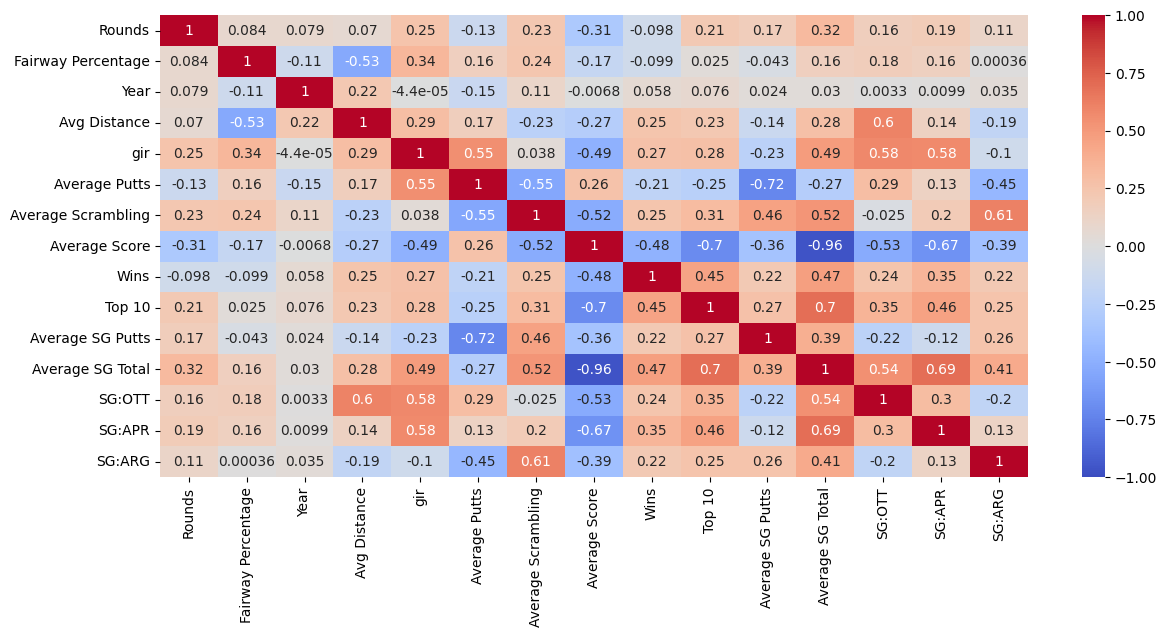

In [44]:
plt.figure(figsize=(14, 6))
sns.heatmap(dfc.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Find correlations in our data

In [45]:
summary_stats = dfc.describe()

print(summary_stats)

            Rounds  Fairway Percentage         Year  Avg Distance  \
count  1678.000000         1678.000000  1678.000000   1678.000000   
mean     78.711561           61.440560  2014.004768    290.807688   
std      14.274137            5.058845     2.608637      8.916631   
min      45.000000           43.020000  2010.000000    266.400000   
25%      69.000000           57.942500  2012.000000    284.900000   
50%      79.500000           61.430000  2014.000000    290.550000   
75%      89.000000           64.910000  2016.000000    296.400000   
max     120.000000           76.880000  2018.000000    319.700000   

               gir  Average Putts  Average Scrambling  Average Score  \
count  1678.000000    1678.000000         1678.000000    1678.000000   
mean     65.661675      29.163331           58.115638      70.921961   
std       2.745411       0.518468            3.384769       0.698305   
min      53.540000      27.510000           44.010000      68.698000   
25%      63.830000

In [46]:
def top_players_by_metric(dfc, metric, top_n=20):
    return dfc.sort_values(by=metric, ascending=False).head(top_n)[['Year', 'Player Name', metric]]

In [47]:
main_metrics = ['Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Money']

for metric in main_metrics:
    print(f"Top players based on {metric}:")
    print(top_players_by_metric(dfc, metric))
    print("\n" + "="*50 + "\n")

# Players with the Most Wins in 1 Season

Top players based on Rounds:
      Year       Player Name  Rounds
630   2015         Danny Lee   120.0
1344  2011       Blake Adams   116.0
412   2016      Kyle Reifers   115.0
1167  2012  Brendon de Jonge   115.0
1550  2010  Brendon de Jonge   114.0
1368  2011     Spencer Levin   113.0
439   2016        Si Woo Kim   113.0
319   2017   Charley Hoffman   112.0
848   2014      Brian Harman   111.0
809   2014  Cameron Tringale   111.0
1558  2010     Spencer Levin   110.0
691   2015      Robert Streb   110.0
1405  2011  Cameron Tringale   110.0
957   2013  Brendon de Jonge   110.0
189   2018        Kevin Tway   110.0
1538  2010      John Merrick   109.0
768   2014  Brendon de Jonge   109.0
1     2018       Ryan Armour   109.0
54    2018        Chris Kirk   108.0
590   2015         Zac Blair   108.0


Top players based on Fairway Percentage:
      Year         Player Name  Fairway Percentage
568   2015  Francesco Molinari               76.88
1486  2010         Omar Uresti               76.0

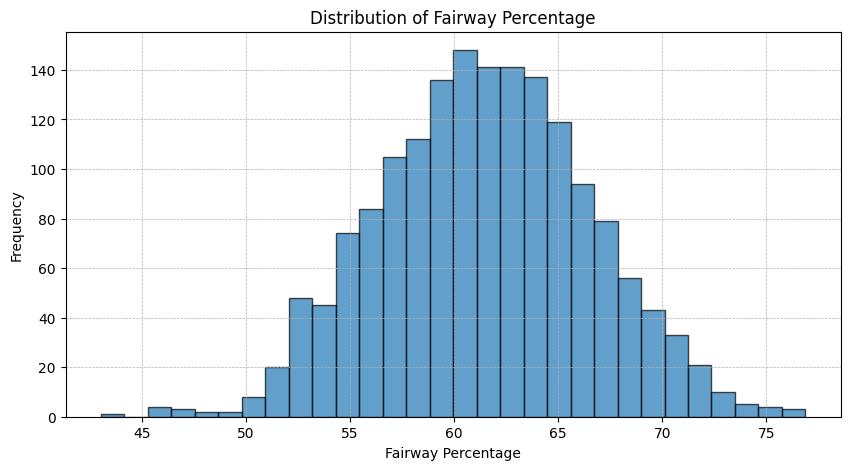

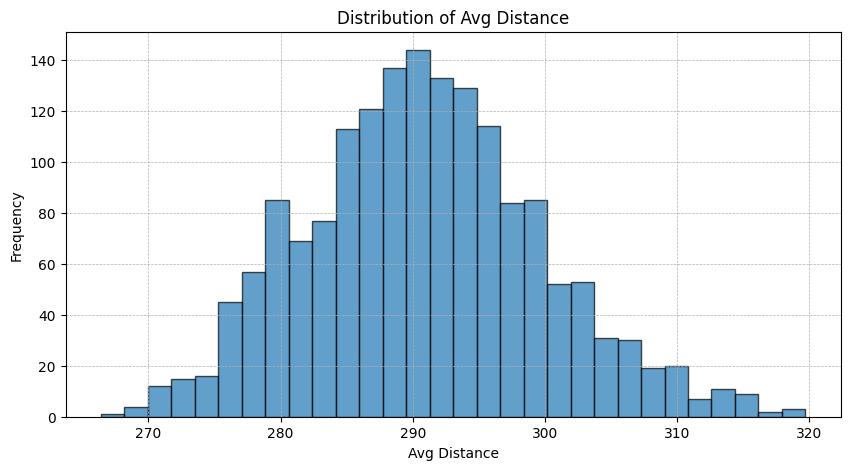

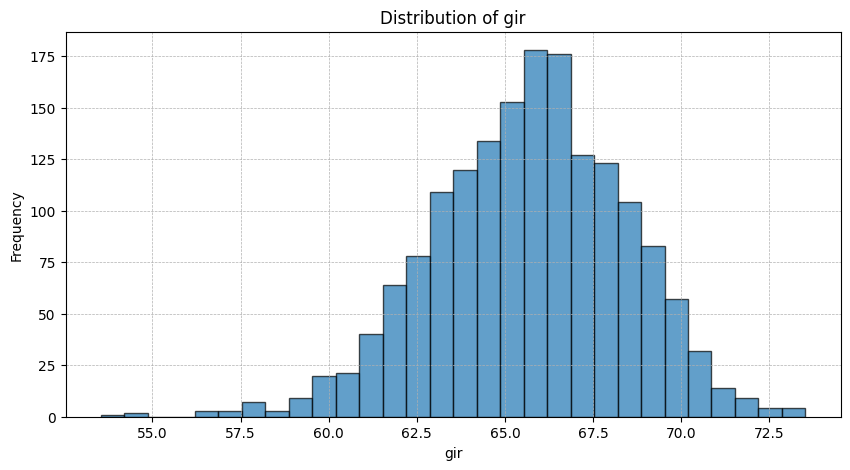

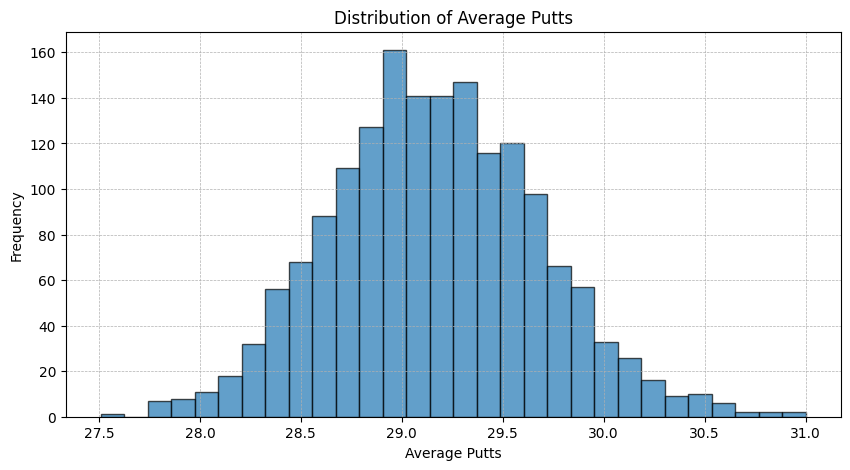

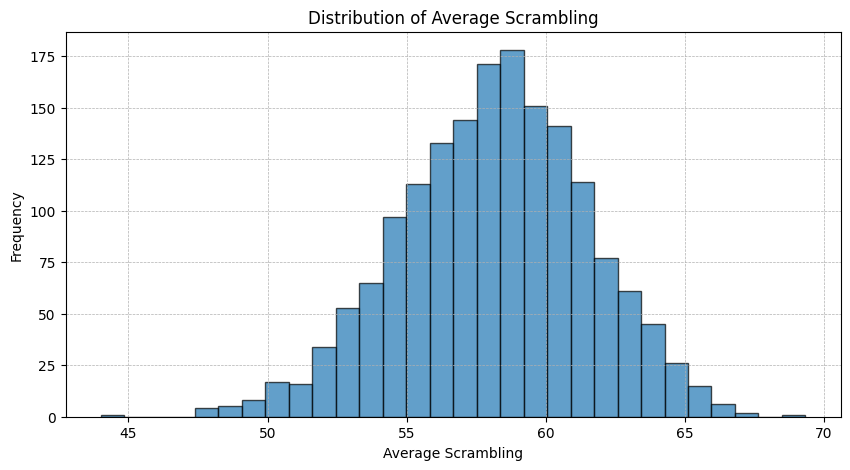

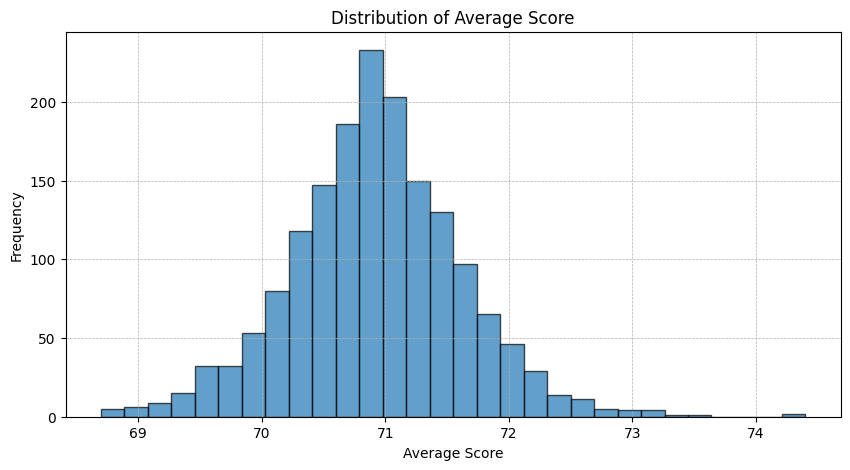

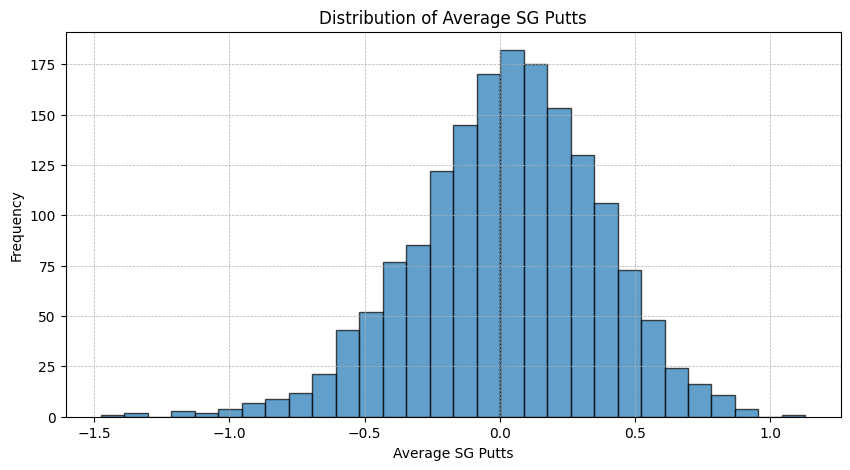

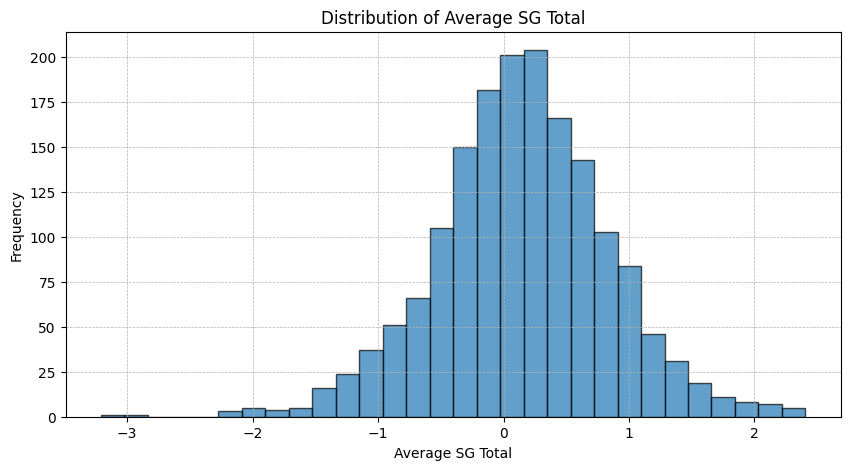

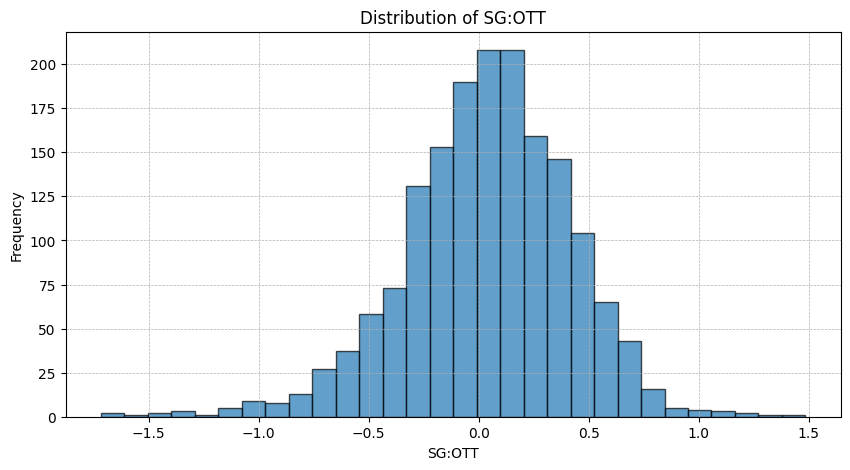

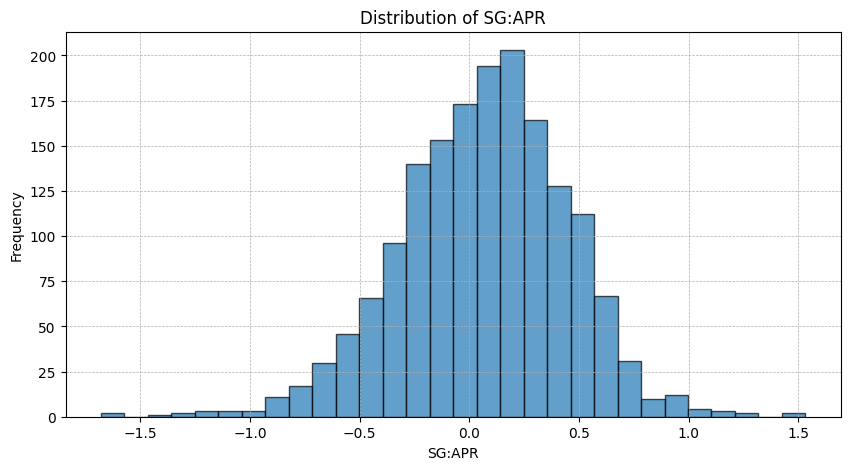

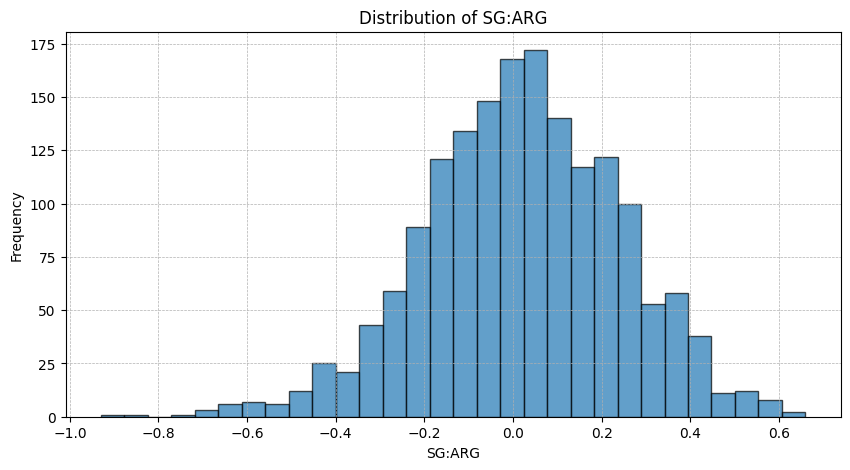

In [48]:
kpis = ['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG']

for kpi in kpis:
    plt.figure(figsize=(10,5))
    plt.hist(df[kpi], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {kpi}')
    plt.xlabel(kpi)
    plt.ylabel('Frequency')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

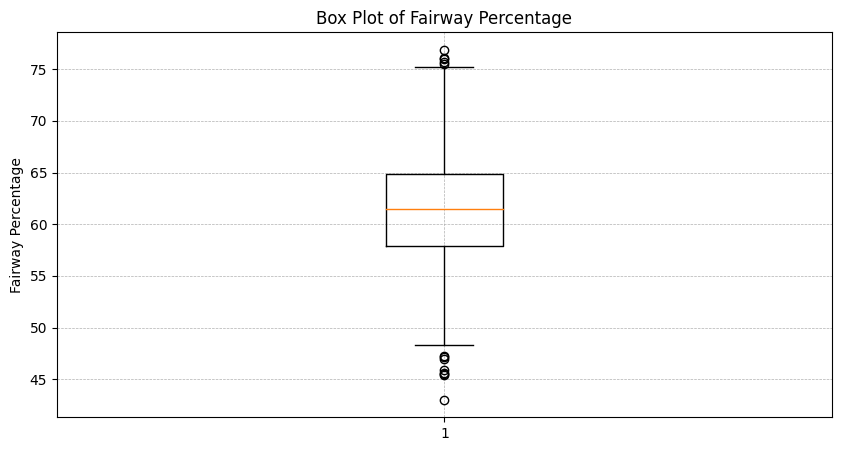

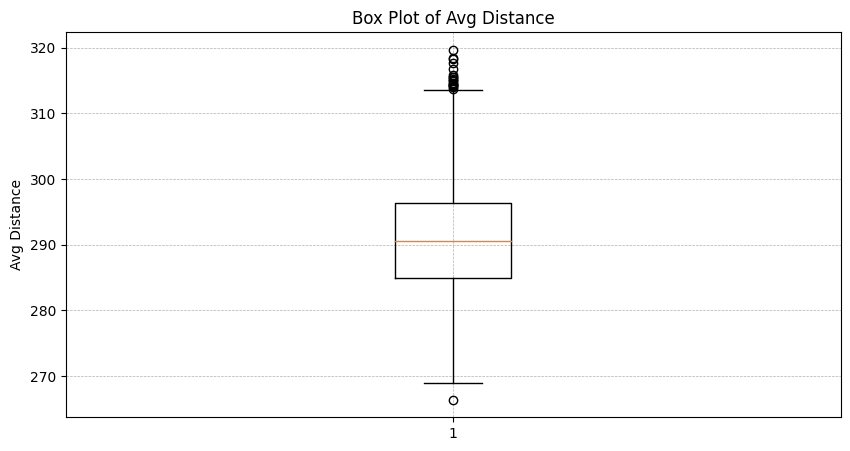

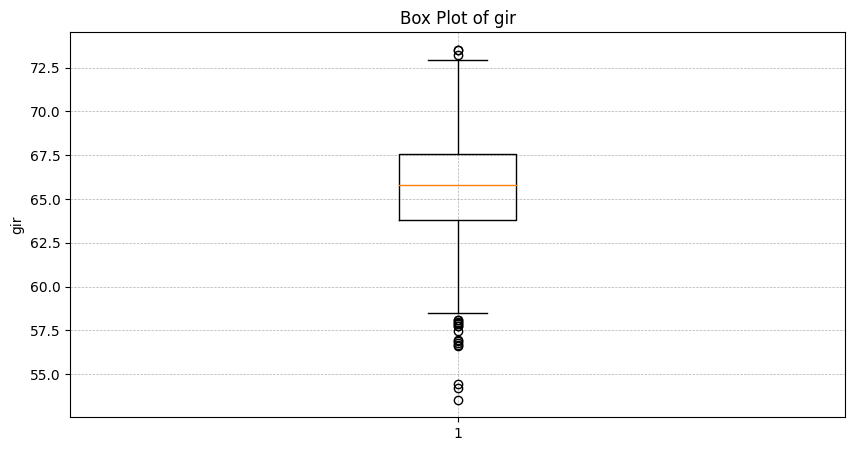

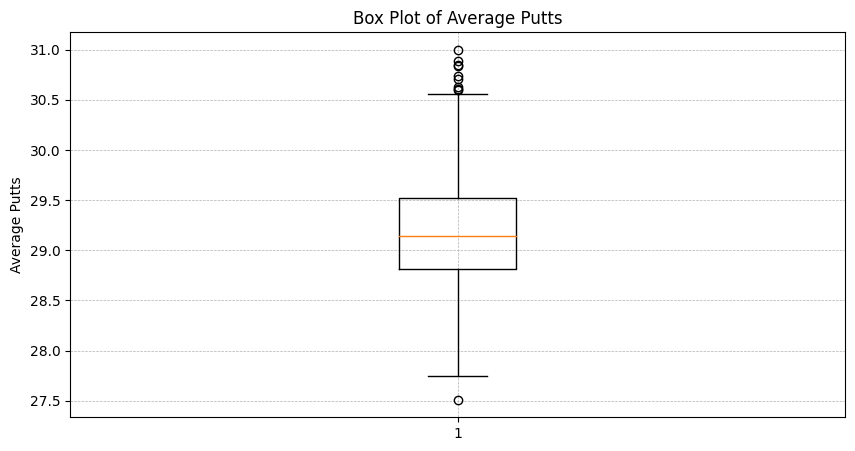

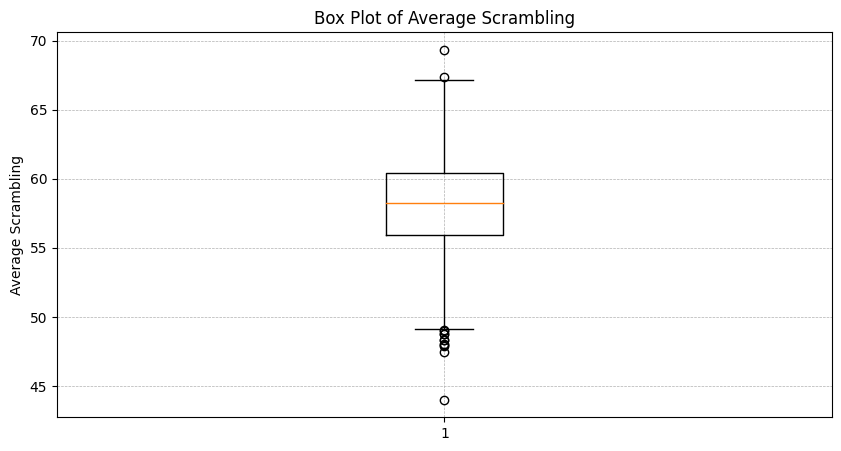

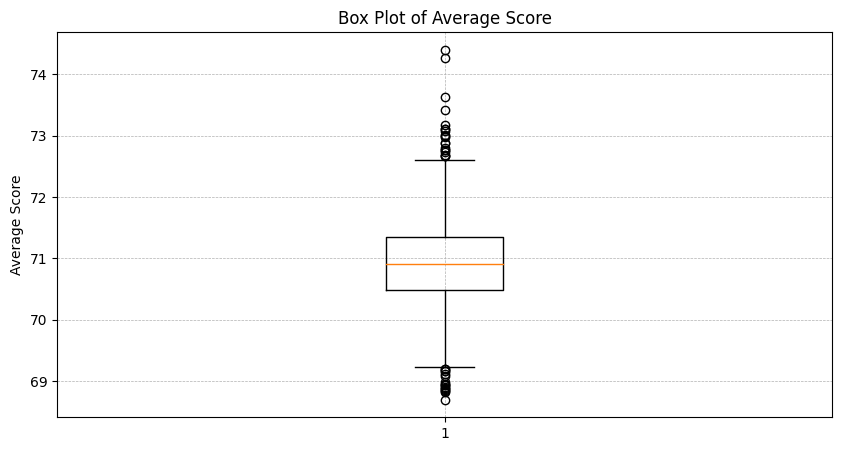

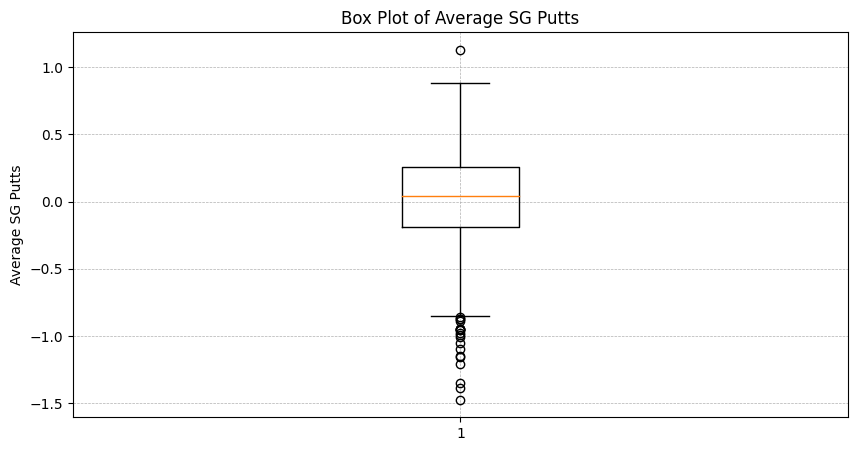

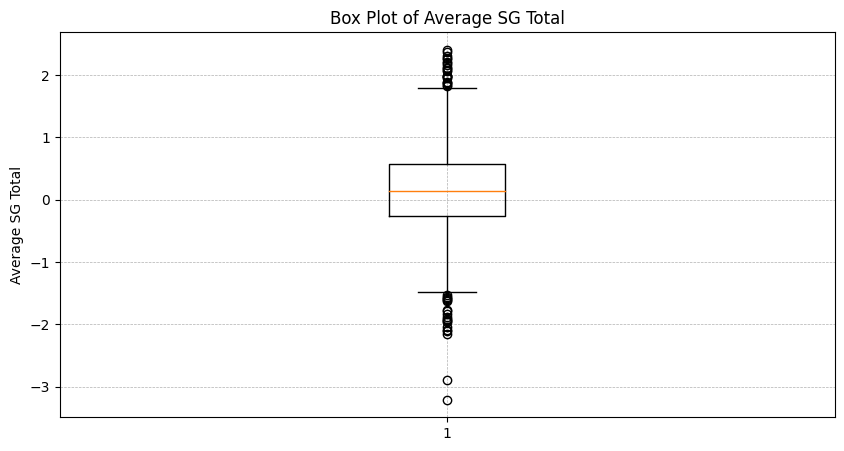

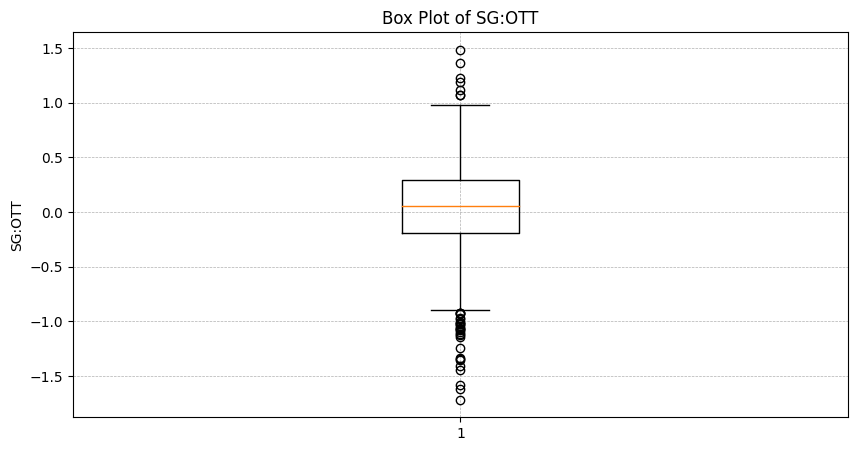

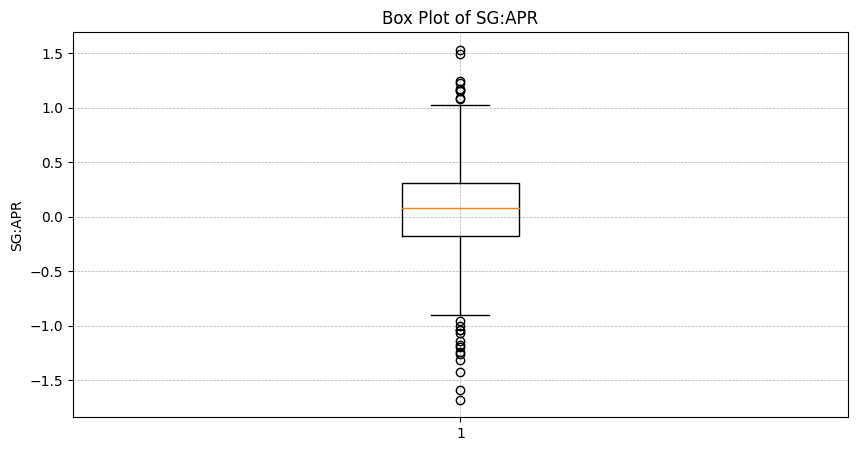

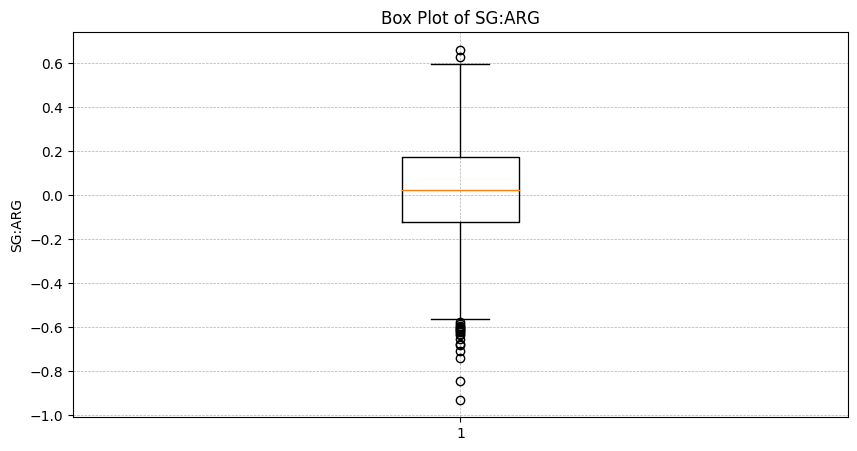

In [49]:
for kpi in kpis:
    plt.figure(figsize=(10,5))
    plt.boxplot(dfc[kpi].dropna())  # dropna() is used to ignore NaN values for plotting
    plt.title(f'Box Plot of {kpi}')
    plt.ylabel(kpi)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

In [50]:


# For example, to get top 20 players based on 'Average Score':
top_average_distance = top_players_by_metric(dfc, 'Avg Distance')
print(top_average_distance)

      Year      Player Name  Avg Distance
162   2018     Rory McIlroy         319.7
1481  2011      J.B. Holmes         318.4
174   2018    Trey Mullinax         318.3
732   2015   Dustin Johnson         317.7
350   2017     Rory McIlroy         316.7
179   2018     Tom Lovelady         315.9
1660  2010  Robert Garrigus         315.5
1243  2012     Bubba Watson         315.5
720   2015     Bubba Watson         315.2
173   2018       Tony Finau         315.1
1451  2011     Bubba Watson         314.9
181   2018        Luke List         314.6
561   2016      J.B. Holmes         314.5
336   2017   Dustin Johnson         314.4
853   2014     Bubba Watson         314.3
1446  2011   Dustin Johnson         314.2
124   2018   Dustin Johnson         314.0
729   2015        Jason Day         313.7
520   2016   Dustin Johnson         313.6
66    2018    Gary Woodland         313.5


In [51]:
sg_metrics = ['Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG']

for metric in sg_metrics:
    print(f"Top players based on {metric}:")
    print(top_players_by_metric(df, metric))
    print("\n" + "="*50 + "\n")

Top players based on Average SG Putts:
      Year       Player Name  Average SG Putts
563   2016         Jason Day             1.130
763   2014   Graeme McDowell             0.882
926   2014    Aaron Baddeley             0.872
1356  2011       Luke Donald             0.870
1605  2010       Luke Donald             0.870
1217  2012   Brandt Snedeker             0.860
990   2013     Greg Chalmers             0.857
885   2014     Greg Chalmers             0.856
251   2017     Rickie Fowler             0.852
268   2017  Michael Thompson             0.840
1597  2010   Carl Pettersson             0.818
1145  2012       Luke Donald             0.818
1619  2010        Paul Casey             0.812
1400  2011        Charlie Wi             0.808
1241  2012       Jonas Blixt             0.804
132   2018     Greg Chalmers             0.790
1527  2010       Dean Wilson             0.781
1384  2011    Steve Stricker             0.780
1636  2010     Greg Chalmers             0.772
1333  2011      Bryce

In [52]:
# Selecting only numerical columns for clustering
data_for_clustering = df[kpis].dropna()

# Standardizing the data (important for k-means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Using KMeans clustering
k = 5  # Let's assume 5 clusters, but you can experiment with this number
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(scaled_data)

# Adding cluster info back to the dataframe
data_for_clustering['Cluster'] = clusters

# Check the mean stats for each cluster
cluster_summary = data_for_clustering.groupby('Cluster').mean()

print(cluster_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Fairway Percentage  Avg Distance        gir  Average Putts  \
Cluster                                                               
0                 66.112951    282.784699  65.771448      28.942541   
1                 58.326200    288.021429  62.765743      28.747229   
2                 59.934134    298.653150  67.221614      28.942913   
3                 59.190905    290.159048  63.960857      29.562810   
4                 61.912430    294.934337  67.537871      29.562008   

         Average Scrambling  Average Score  Average SG Putts  \
Cluster                                                        
0                 60.728743      70.693727          0.167481   
1                 58.737057      71.267417          0.208863   
2                 60.320591      69.935933          0.186319   
3                 53.711905      71.959714         -0.285052   
4                 56.490803      70.912215         -0.158309   

         Average SG Total    SG:OTT    SG:APR    SG:A

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

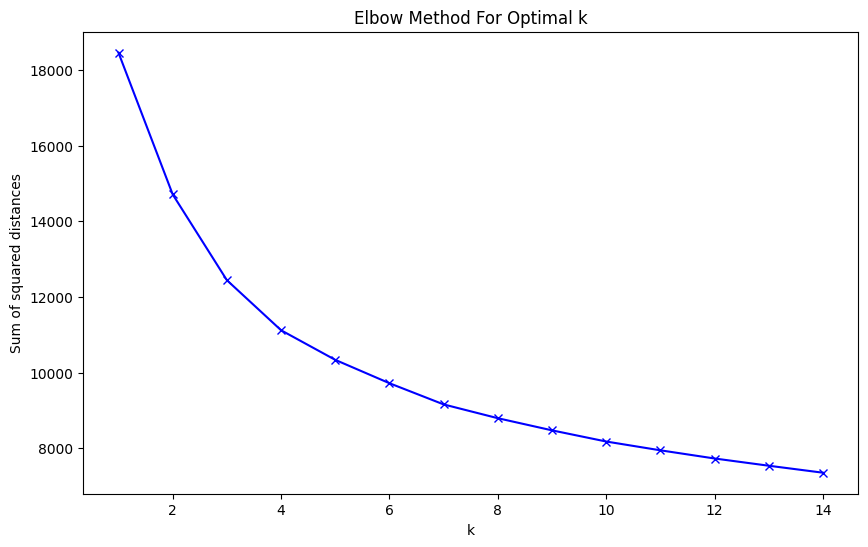

In [53]:
# Determine the sum of squared distances for different numbers of clusters
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [107]:
selected_player = "Rory McIlroy"
player_data = df[df['Player Name'] == selected_player]

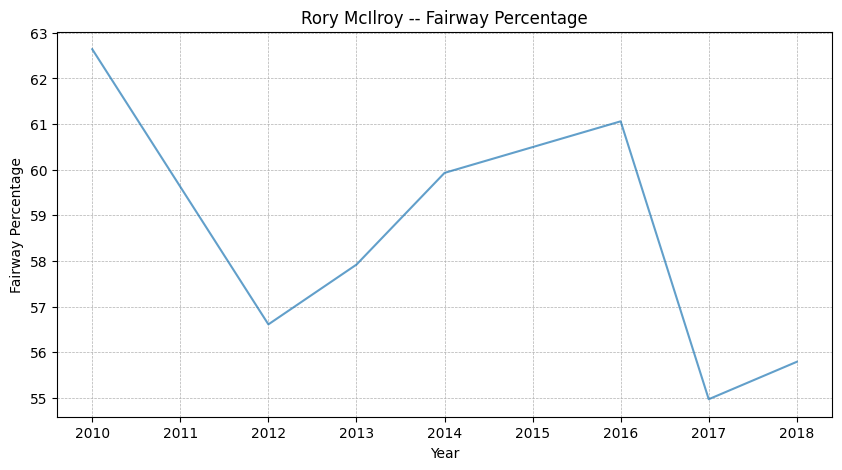

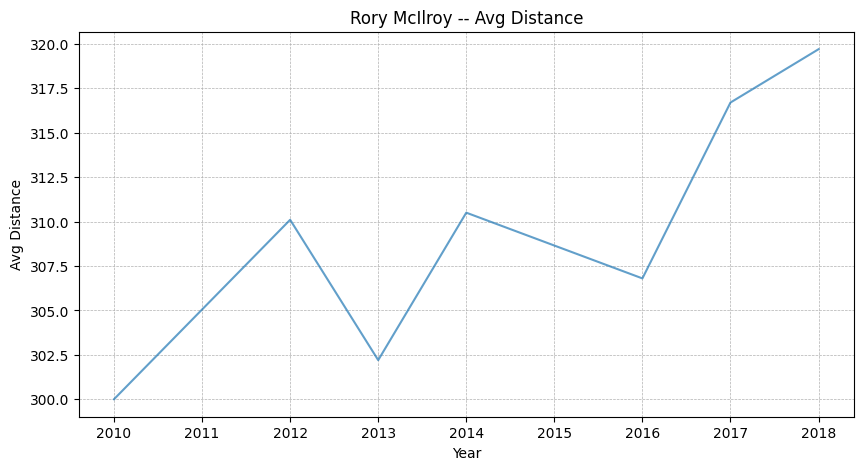

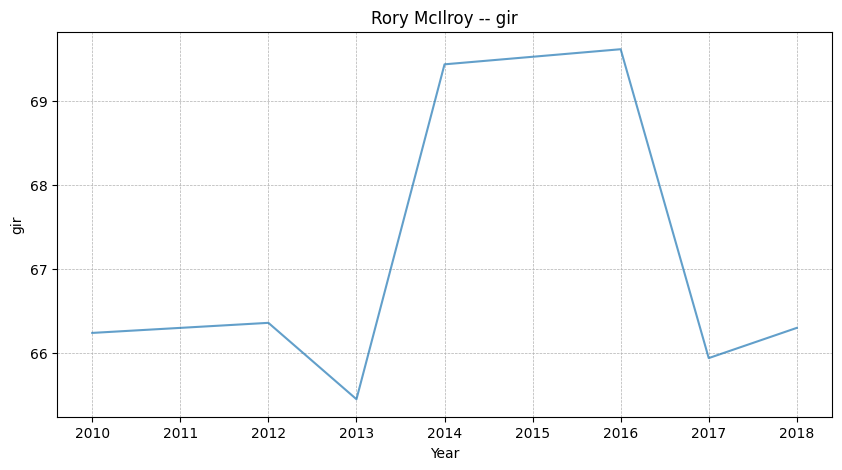

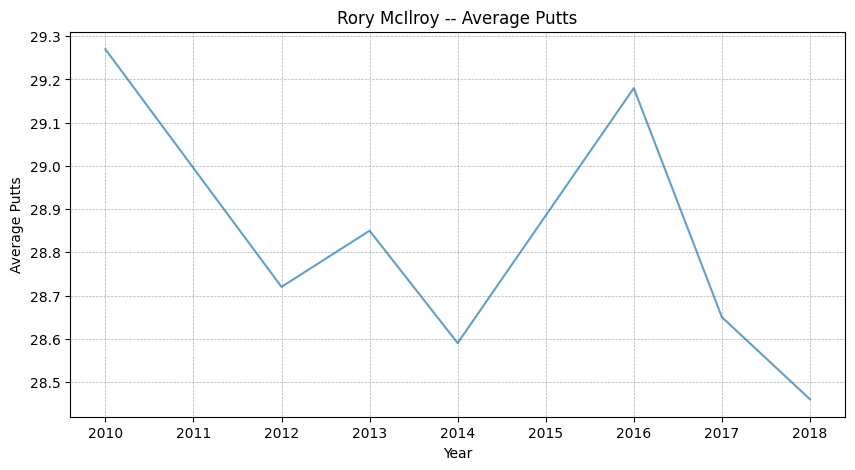

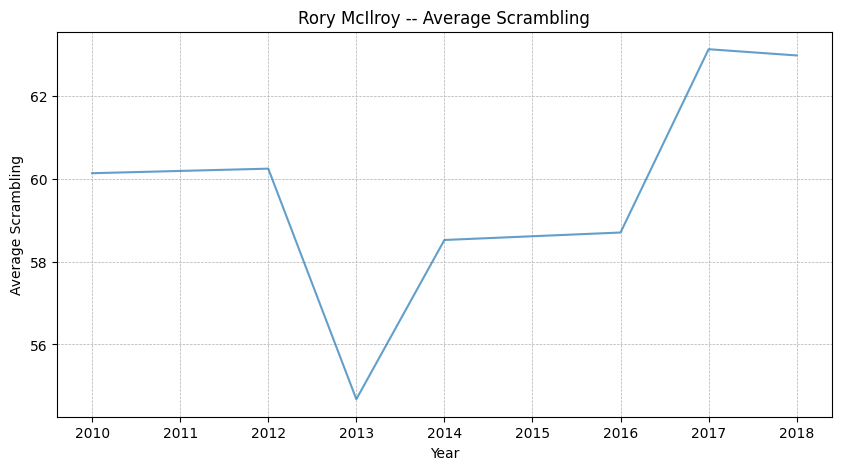

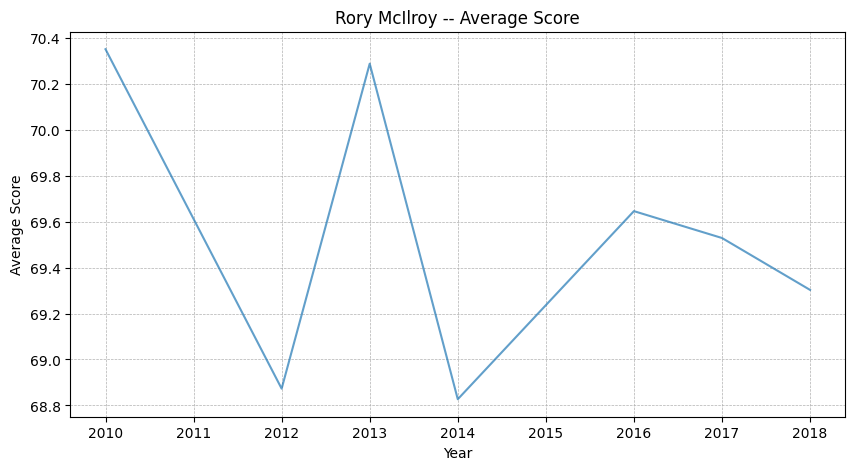

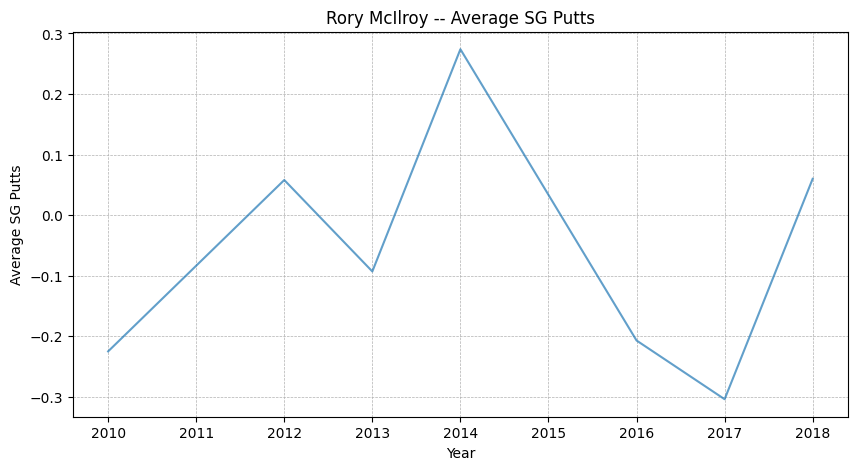

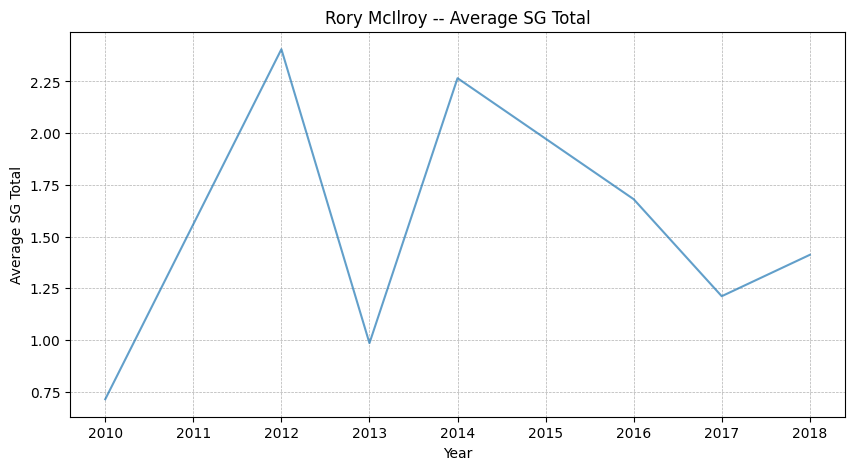

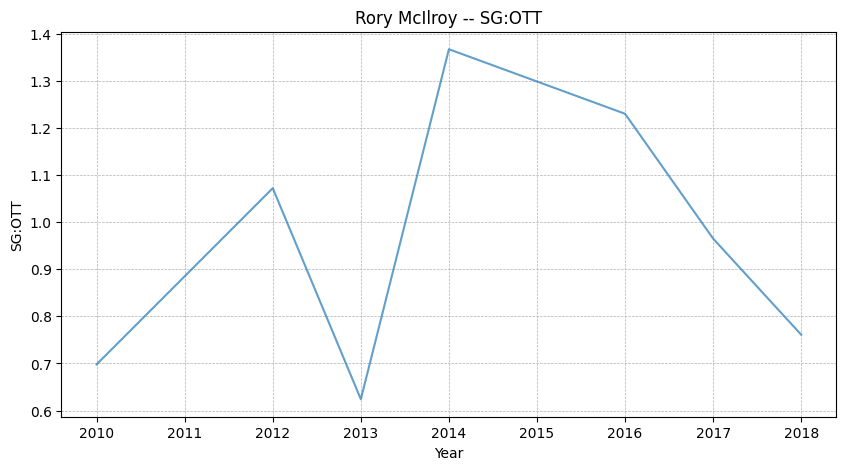

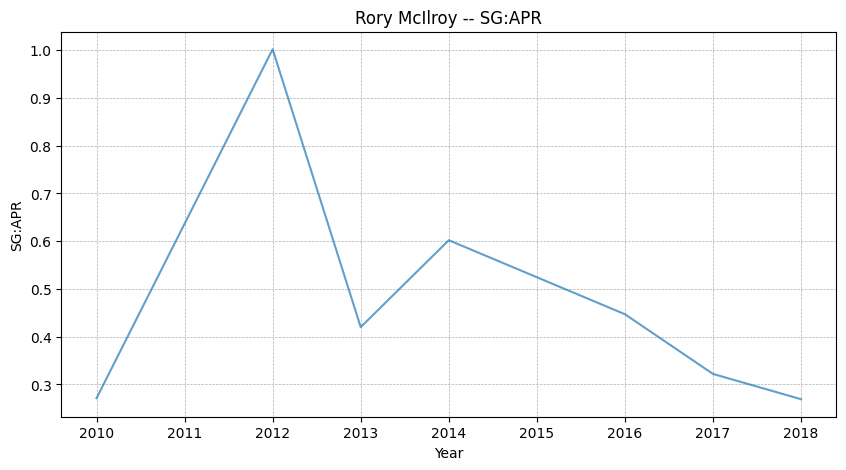

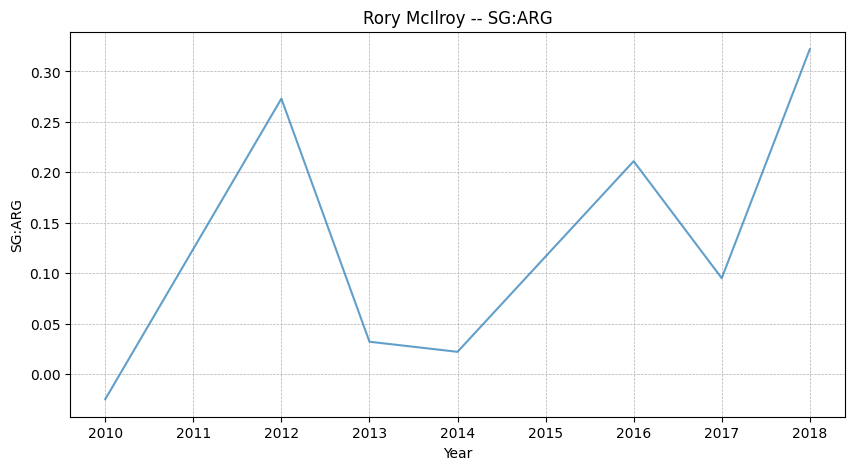

In [56]:
kpis = ['Fairway Percentage', 'Avg Distance', 'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Average SG Putts', 'Average SG Total', 'SG:OTT', 'SG:APR', 'SG:ARG']

for kpi in kpis:
    plt.figure(figsize=(10,5))
    plt.plot(player_data['Year'], player_data[kpi], alpha=0.7)
    plt.title(f'{selected_player} -- {kpi}')
    plt.xlabel('Year')
    plt.ylabel(kpi)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()


# Plot trends for specific players

In [57]:
dfc.columns

Index(['Player Name', 'Rounds', 'Fairway Percentage', 'Year', 'Avg Distance',
       'gir', 'Average Putts', 'Average Scrambling', 'Average Score', 'Points',
       'Wins', 'Top 10', 'Average SG Putts', 'Average SG Total', 'SG:OTT',
       'SG:APR', 'SG:ARG', 'Money'],
      dtype='object')

In [109]:
# Linear Regression Model

# Selecting features and target
X = dfc[['Fairway Percentage', 'gir', 'Average Putts', 'Avg Distance', 'SG:APR']] # Features
y = dfc['Average Score'] # Target

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Building the model
model = LinearRegression()
model.fit(X_train, y_train) # Train the model on the train data

# Predicting and calculating error
y_pred = model.predict(X_test) # Test the model on the test data
mse = mean_squared_error(y_test, y_pred) # Quantify the relationship of the prediction and the results

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.09143363542788772


In [110]:
rmse = np.sqrt(mse) # Change the units out of squared for better understanding
print(f"Root Mean Squared Error: {rmse}")



Root Mean Squared Error: 0.30237995209320295


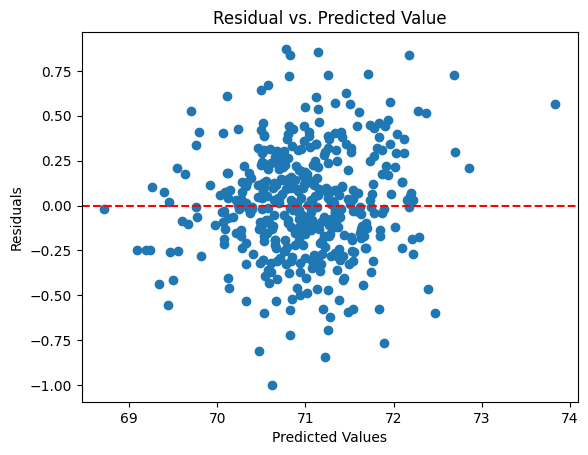

In [111]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual vs. Predicted Value')
plt.show()

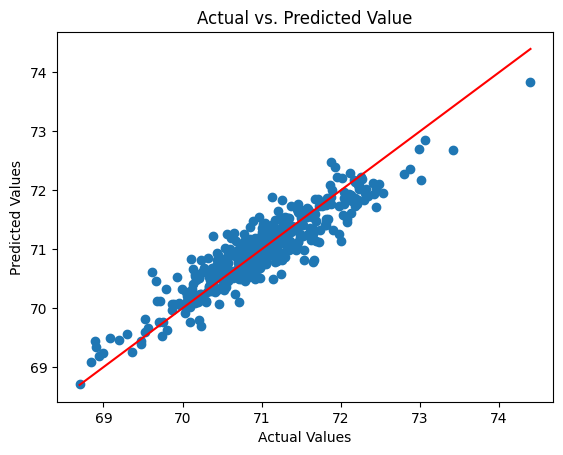

In [112]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Value')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.show()


In [113]:
coefficients = model.coef_
features = X.columns
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef}")

# These coefficients show the feature impact on the target (Average Score)
# So, for each 1% of an increase in Fairway Percentage, the Average Score decreases by about 0.0143 units
# Likewise, for each additional putt, the Average Score increases by about 0.989 units
# These figures make sense because if you hit the greens more, you should get a better score,
# and if you take more putts, you should get a higher score.

Fairway Percentage: -0.032828680305273035
gir: -0.09946997669546188
Average Putts: 0.8396489818925007
Avg Distance: -0.02530687734995181
SG:APR: -0.801490987157102


In [114]:
# Here we can evaluate our features to see if they are significant to the Target.
# p-values of <= 0.05 mean they are significant to the Target.
# the larger the abs. value of the t-value, the more significant that feature is to the Target.

# Adding a constant to the model (it's a requirement for the statsmodels regression model)
X_train_sm = sm.add_constant(X_train)

# Building the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Printing out the summary which contains coefficient values, t-values, p-values, etc.
print(model_sm.summary())

# The p-value for "Rounds" is 0.270, meaning this feature is insignificant to the Average Score

                            OLS Regression Results                            
Dep. Variable:          Average Score   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     806.7
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        03:10:42   Log-Likelihood:                -383.96
No. Observations:                1258   AIC:                             779.9
Df Residuals:                    1252   BIC:                             810.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 62.3928      0

In [115]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [116]:
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}%")

R-Squared: 0.8418320170624836
Root Mean Squared Error: 0.30237995209320295
Mean Absolute Error: 0.23642986003763608
Mean Absolute Percentage Error: 0.33269880291310594%


In [117]:
# Random Forrest Model

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees in the forest

# Fit the model
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print(f"Random Forest R-Squared: {r2_rf}")
print(f"Random Forest Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest Mean Absolute Error: {mae_rf}")
print(f"Random Forest Mean Absolute Percentage Error: {mape_rf}%")



Random Forest R-Squared: 0.7769658899548528
Random Forest Root Mean Squared Error: 0.35907018839370936
Random Forest Mean Absolute Error: 0.28007097619047533
Random Forest Mean Absolute Percentage Error: 0.3940596671677874%


In [124]:
importances = rf_model.feature_importances_
for feature, imp in zip(X.columns, importances):
    print(f"{feature}: {imp}")


# Show Feature importance for Random Forest Model

# This data shows that Average Putts: 22.3% - This indicates that, according to the RF model,
# the "Average Putts" feature contributes the most towards predicting a player's average score.


Fairway Percentage: 0.06714785671894401
gir: 0.15148044713182046
Average Putts: 0.22313550971290444
Avg Distance: 0.08492103290486507
SG:APR: 0.47331515353146597


In [125]:
# Using Linear Regression as an example

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# The scores returned are negative because it's a 'loss' that sklearn tries to minimize
# We'll take the negative to get MSE and then the square root for RMSE
rmse_scores = np.sqrt(-scores)

print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard Deviation:", rmse_scores.std())


Scores: [0.35846836 0.32866706 0.32053032 0.37058375 0.30986653]
Mean: 0.33762320407857443
Standard Deviation: 0.023081293619783946


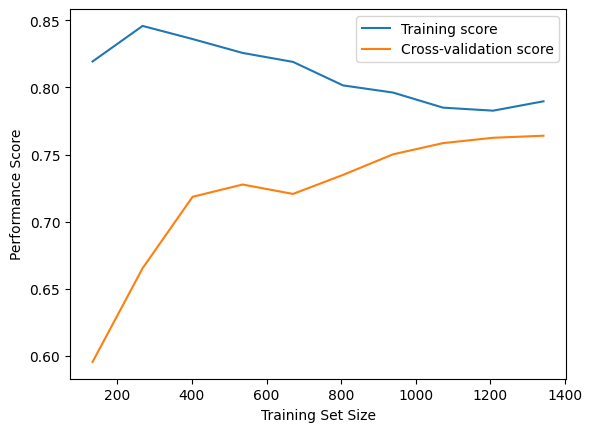

In [126]:
# Linear Regression Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Performance Score')
plt.legend(loc='best')
plt.show()

# Plotting learning curves shows model performance on both the training and validation sets as a function of the training set size.
# Both curves should ideally plateau at a high score, indicating that the model is performing well.

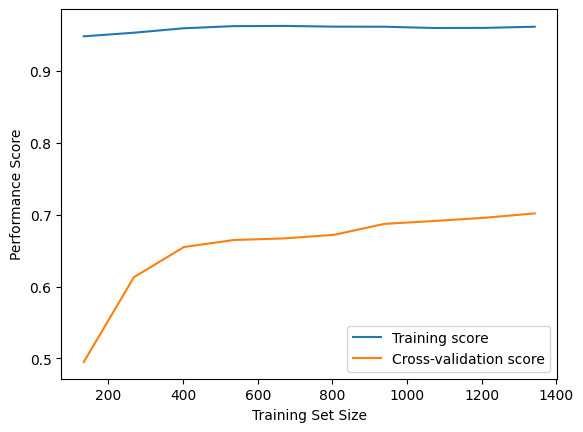

In [121]:
# Random Forest Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Performance Score')
plt.legend(loc='best')
plt.show()

# Plotting learning curves shows model performance on both the training and validation sets as a function of the training set size.
# Both curves should ideally plateau at a high score, indicating that the model is performing well.

In [122]:
print(X)

      Fairway Percentage    gir  Average Putts  Avg Distance  SG:APR
0                  75.19  73.51          29.93         291.5   0.960
1                  73.58  68.22          29.31         283.5   0.213
2                  72.24  68.67          29.12         286.5   0.437
3                  71.94  68.80          29.17         289.2   0.532
4                  71.44  67.12          29.11         278.9   0.099
...                  ...    ...            ...           ...     ...
1673               52.66  65.13          28.79         299.1   0.738
1674               52.21  65.66          29.78         305.7  -0.374
1675               51.29  65.88          29.14         292.9   0.336
1676               51.27  61.64          28.88         295.9  -1.070
1677               50.15  64.79          29.41         300.7  -0.553

[1678 rows x 5 columns]


In [134]:
# Lets test against our hypothetical data

def predict_average_score(model):
    # Input feature values
    print("Enter the details of the hypothetical player:")

    fairway_percentage = float(input("Enter Fairway Percentage %: "))
    gir = float(input("Enter GIR (Greens in Regulation) %: "))
    avg_putts = float(input("Enter Average Putts: "))
    avg_distance = float(input("Enter Average Distance yds: "))
    sg_apr = float(input("Enter SG:APR (Strokes Gained on Approach): "))

    # Create a DataFrame from the input data
    player_data = pd.DataFrame({
        'Fairway Percentage': [fairway_percentage],
        'gir': [gir],
        'Average Putts': [avg_putts],
        'Avg Distance': [avg_distance],
        'SG:APR': [sg_apr]
    })

    # Use the model to make a prediction
    predicted_score = model.predict(player_data)

    # Return the predicted average score
    return predicted_score[0]


In [135]:
df.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [136]:
predicted = predict_average_score(model)
print(f"\nThe predicted average score for the hypothetical player is: {predicted:.2f}")

Enter the details of the hypothetical player:
Enter Fairway Percentage %: 45
Enter GIR (Greens in Regulation) %: 45
Enter Average Putts: 35
Enter Average Distance yds: 275
Enter SG:APR (Strokes Gained on Approach): -7

The predicted average score for the hypothetical player is: 84.48
